# Datacamp Project: Anime TV-Shows Dataset 2023
__Fiona Hak<sup>1</sup>, Elora Vigo<sup>1</sup>, Céline Guo<sup>1</sup>, Shun Robert<sup>1</sup> et  Julien Giovanazzi<sup>2</sup>__
<br>
<sup>1. M2 AMI2B<br>2. M2 Agro</sup>

## Table of contents
* [Introduction](#introduction)
* [Requirements](#requirements)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

### Introduction <a class="anchor" id="introduction"></a>
The provided dataset comprises details about various anime series, encompassing information such as titles, episode counts release date ranges, member counts, and user scores. It represents a curated compilation of popular anime series as of its creation, totaling 4700 entries. The columns include Name (the anime title), Episodes (total number of episodes), Release (date range of release), Members (number of MyAnimeList users who added the anime), and Score (user-assigned score). These data were scraped from MyAnimeList, a renowned anime and manga database, for which credit is duly acknowledged. 

The issue raised was whether we'd be able to predict anime scores based on various quantitative variables, such as the number of episodes or the number of times they've been selected by users.

### Requirements <a class="anchor" id="requirements"></a>

In [41]:
import subprocess
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

### The dataset <a class="anchor" id="dataset"></a>

The dataset is structured in the form of a table with five columns. Each row represents an anime series along with its characteristics. The first column, "Name," contains the title of the anime. The second column, "Episodes," indicates the total number of episodes in the series. The third column, "Release," presents the release date range of the anime. The fourth column, "Members," provides the number of MyAnimeList users who have added the anime to their list. Finally, the fifth column, "Score," displays the user-assigned score for the anime. Each row in the dataset represents a distinct entry for a specific anime series, along with its associated details.

The data was uploaded [here](https://www.kaggle.com/datasets/forgetabhi/anime-tv-shows-dataset-2023/data) after creating an account. The original file is available in the data/original_data/ folder.

The train and test data were randomly split into 80/20% proportions with the command :

In [42]:
subprocess.run('head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', shell=True)

CompletedProcess(args='head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', returncode=0)

### Data exploration <a class="anchor" id="exploration"></a>
First, let's visualize the data.

In [43]:
data_df = pd.read_csv('data/original_data/anime_data.csv')

In [44]:
train_df = pd.read_csv('data/train.csv')
train_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,2052.0,Tesagure! Bukatsumono Encore,12,Jan 2014 - Mar 2014,4922,7.02
1,3655.0,Ikemen Sengoku: Toki wo Kakeru ga Koi wa Hajim...,12,Jul 2017 - Sep 2017,8868,6.25
2,2452.0,Kinsou no Vermeil: Gakeppuchi Majutsushi wa Sa...,12,Jul 2022 - Sep 2022,266803,6.81
3,515.0,Magi: Sinbad no Bouken (TV),13,Apr 2016 - Jul 2016,475674,7.84
4,338.0,Koukyoushihen Eureka Seven,50,Apr 2005 - Apr 2006,433183,8.05
...,...,...,...,...,...,...
3755,3223.0,DD Hokuto no Ken (2013),13,Apr 2013 - Jun 2013,4274,6.48
3756,3443.0,Kagewani,13,Oct 2015 - Dec 2015,32928,6.37
3757,3423.0,Ganbare Goemon,23,Oct 1997 - Mar 1998,1637,6.38
3758,1238.0,Dotto Koni-chan,26,Nov 2000 - May 2001,4719,7.36


In [45]:
test_df = pd.read_csv('data/test.csv')
test_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,3576,Jikan no Shihaisha,13.0,Jul 2017 - Sep 2017,68257,6.30
1,4524,Haja Kyosei G Dangaiou,13.0,Apr 2001 - Jul 2001,3232,5.40
2,238,Ao Ashi,24.0,Apr 2022 - Sep 2022,201454,8.19
3,1176,Hakkenden: Touhou Hakken Ibun,13.0,Jan 2013 - Mar 2013,114118,7.39
4,786,Fushigi Yuugi,52.0,Apr 1995 - Mar 1996,118907,7.61
...,...,...,...,...,...,...
936,3142,Persona: Trinity Soul,26.0,Jan 2008 - Jun 2008,82361,6.51
937,3020,Android Ana Maico 2010,24.0,Apr 1998 - Sep 1998,3802,6.56
938,838,Ajin Part 2,13.0,Oct 2016 - Dec 2016,293353,7.57
939,1847,Dokidoki♡Densetsu: Mahoujin Guruguru,38.0,Apr 2000 - Dec 2000,4178,7.11


Here are some summaries of the nature and distribution of the data:

In [46]:
print(train_df.info()) ; print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3759 non-null   float64
 1   Name        3760 non-null   object 
 2   Episodes    3734 non-null   object 
 3   Release     3760 non-null   object 
 4   Members     3760 non-null   object 
 5   Score       3753 non-null   object 
dtypes: float64(1), object(5)
memory usage: 176.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  941 non-null    int64  
 1   Name        941 non-null    object 
 2   Episodes    934 non-null    float64
 3   Release     941 non-null    object 
 4   Members     941 non-null    int64  
 5   Score       940 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 44.2+ KB
None


We can see that there are 3760 rows in the train dataframe and 941 in test. There are non-zero values in the important episodes and score columns in both cases. The unnamed column corresponds to the ranking count of the various animes in the original file and is of no interest to us here. Some columns of interest, including episodes, members and score, are of object type and will have to be converted back to float and int for analysis purposes, and missing data indexed as NaN.

In [55]:
#convert to numeric
num_scores = pd.to_numeric(train_df['Score'], errors='coerce')
num_episodes = pd.to_numeric(train_df['Episodes'], errors='coerce')
num_members = pd.to_numeric(train_df['Members'], errors='coerce')

#Diviser la colonne "Release" en deux colonnes distinctes "Release_Start" et "Release_End"
train_df[['Release_Start', 'Release_End']] = train_df['Release'].str.extract(r'(\w{3} \d{4})? - ?(\w{3} \d{4})?')

# Convertir les colonnes "Release_Start" et "Release_End" en datetime en spécifiant le format
train_df['Release_Start'] = pd.to_datetime(train_df['Release_Start'], format='%b %Y', errors='coerce')
train_df['Release_End'] = pd.to_datetime(train_df['Release_End'], format='%b %Y', errors='coerce')

train_df['Release_Start_Month'] = train_df['Release_Start'].dt.month
train_df['Release_Start_Year'] = train_df['Release_Start'].dt.year

train_df['Release_End_Month'] = train_df['Release_End'].dt.month
train_df['Release_End_Year'] = train_df['Release_End'].dt.year

train_df['Duration'] = train_df['Release_End'] - train_df['Release_Start']
train_df['Duration'] = train_df['Duration'].dt.days

# Remplacer les valeurs vides par des valeurs NaN
train_df.replace('', pd.NA, inplace=True)

# Afficher le DataFrame avec les colonnes divisées et converties
print(train_df.head())


   Unnamed: 0                                               Name Episodes  \
0      2052.0                       Tesagure! Bukatsumono Encore       12   
1      3655.0  Ikemen Sengoku: Toki wo Kakeru ga Koi wa Hajim...       12   
2      2452.0  Kinsou no Vermeil: Gakeppuchi Majutsushi wa Sa...       12   
3       515.0                        Magi: Sinbad no Bouken (TV)       13   
4       338.0                         Koukyoushihen Eureka Seven       50   

               Release Members Score Release_Start Release_End  \
0  Jan 2014 - Mar 2014    4922  7.02    2014-01-01  2014-03-01   
1  Jul 2017 - Sep 2017    8868  6.25    2017-07-01  2017-09-01   
2  Jul 2022 - Sep 2022  266803  6.81    2022-07-01  2022-09-01   
3  Apr 2016 - Jul 2016  475674  7.84    2016-04-01  2016-07-01   
4  Apr 2005 - Apr 2006  433183  8.05    2005-04-01  2006-04-01   

   Release_Start_Month  Release_Start_Year  Duration  Release_End_Month  \
0                  1.0              2014.0      59.0             

The target variable is in the column Score since we classify the animes' popularity.

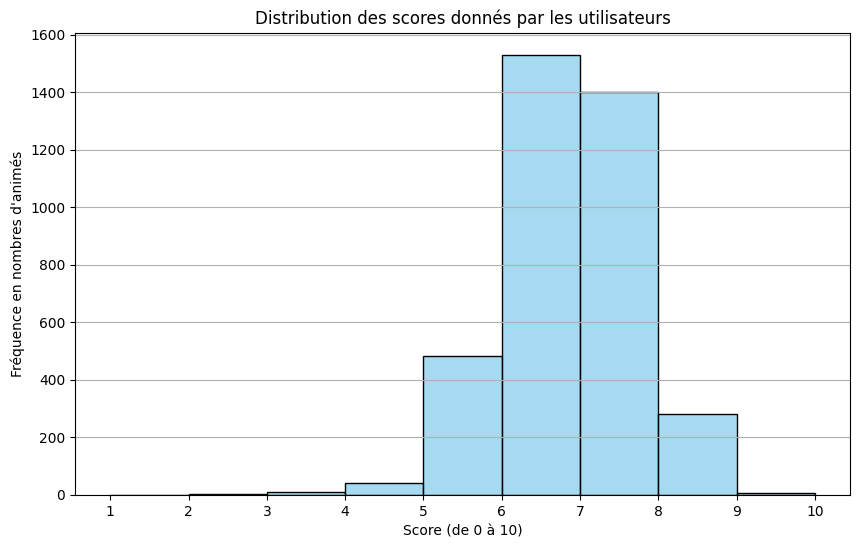

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(num_scores.dropna(), bins=range(1, 11), kde=False, color='skyblue')
plt.title('Distribution des scores donnés par les utilisateurs') ; plt.xlabel('Score (de 0 à 10)') ; plt.ylabel('Fréquence en nombres d\'animés')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.show()

The distribution of scores is fairly unbalanced, peaking at around 7.

Finally, we have plotted the relationships between the main variables and the score:

In [49]:
#Diviser la colonne "Release" en deux colonnes distinctes "Release_Start" et "Release_End"
data_df[['Release_Start', 'Release_End']] = data_df['Release'].str.extract(r'(\w{3} \d{4})? - ?(\w{3} \d{4})?')

# Convertir les colonnes "Release_Start" et "Release_End" en datetime en spécifiant le format
data_df['Release_Start'] = pd.to_datetime(data_df['Release_Start'], format='%b %Y', errors='coerce')
data_df['Release_End'] = pd.to_datetime(data_df['Release_End'], format='%b %Y', errors='coerce')

# Extrait du mois et de l'année pour Release_Start
data_df['Release_Start_Month'] = data_df['Release_Start'].dt.month
data_df['Release_Start_Year'] = data_df['Release_Start'].dt.year

# Extrait du mois et de l'année pour Release_End
data_df['Release_End_Month'] = data_df['Release_End'].dt.month
data_df['Release_End_Year'] = data_df['Release_End'].dt.year

# Remplacer les valeurs vides par des valeurs NaN
data_df.replace('', pd.NA, inplace=True)

# Afficher le DataFrame avec les colonnes divisées et converties
print(data_df.head())


   Unnamed: 0                                Name  Episodes  \
0           0                   Sousou no Frieren      28.0   
1           1    Fullmetal Alchemist: Brotherhood      64.0   
2           2                         Steins;Gate      24.0   
3           3                            Gintama°      51.0   
4           4  Shingeki no Kyojin Season 3 Part 2      10.0   

               Release  Members  Score Release_Start Release_End  \
0           Sep 2023 -   493571   9.13    2023-09-01         NaT   
1  Apr 2009 - Jul 2010  3292928   9.09    2009-04-01  2010-07-01   
2  Apr 2011 - Sep 2011  2526417   9.07    2011-04-01  2011-09-01   
3  Apr 2015 - Mar 2016   620676   9.06    2015-04-01  2016-03-01   
4  Apr 2019 - Jul 2019  2227792   9.05    2019-04-01  2019-07-01   

   Release_Start_Month  Release_Start_Year  Release_End_Month  \
0                  9.0              2023.0                NaN   
1                  4.0              2009.0                7.0   
2                

In [50]:
data_df['Duration'] = data_df['Release_End'] - data_df['Release_Start']
data_df['Duration'] = data_df['Duration'].dt.days
data_df

,Unnamed: 0,Name,Episodes,Release,Members,Score,Release_Start,Release_End,Release_Start_Month,Release_Start_Year,Release_End_Month,Release_End_Year,Duration
0,0,Sousou no Frieren,28.0,Sep 2023 -,493571,9.13,2023-09-01,NaT,9.0,2023.0,NaN,NaN,NaN
1,1,Fullmetal Alchemist: Brotherhood,64.0,Apr 2009 - Jul 2010,3292928,9.09,2009-04-01,2010-07-01,4.0,2009.0,7.0,2010.0,456.0
2,2,Steins;Gate,24.0,Apr 2011 - Sep 2011,2526417,9.07,2011-04-01,2011-09-01,4.0,2011.0,9.0,2011.0,153.0
3,3,Gintama°,51.0,Apr 2015 - Mar 2016,620676,9.06,2015-04-01,2016-03-01,4.0,2015.0,3.0,2016.0,335.0
4,4,Shingeki no Kyojin Season 3 Part 2,10.0,Apr 2019 - Jul 2019,2227792,9.05,2019-04-01,2019-07-01,4.0,2019.0,7.0,2019.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,4695,Shounen Santa no Daibouken!,24.0,Apr 1996 - Sep 1996,482,NaN,1996-04-01,1996-09-01,4.0,1996.0,9.0,1996.0,153.0
4696,4696,Shounen Tokugawa Ieyasu,20.0,Apr 1975 - Sep 1975,636,NaN,1975-04-01,1975-09-01,4.0,1975.0,9.0,1975.0,153.0
4697,4697,Shouwang Zhengfeng,26.0,Nov 2016 - Dec 2016,88,NaN,2016-11-01,2016-12-01,11.0,2016.0,12.0,2016.0,30.0
4698,4698,Shouwang Zhengfeng Shen Jiang Zhi Nu,26.0,-,47,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN


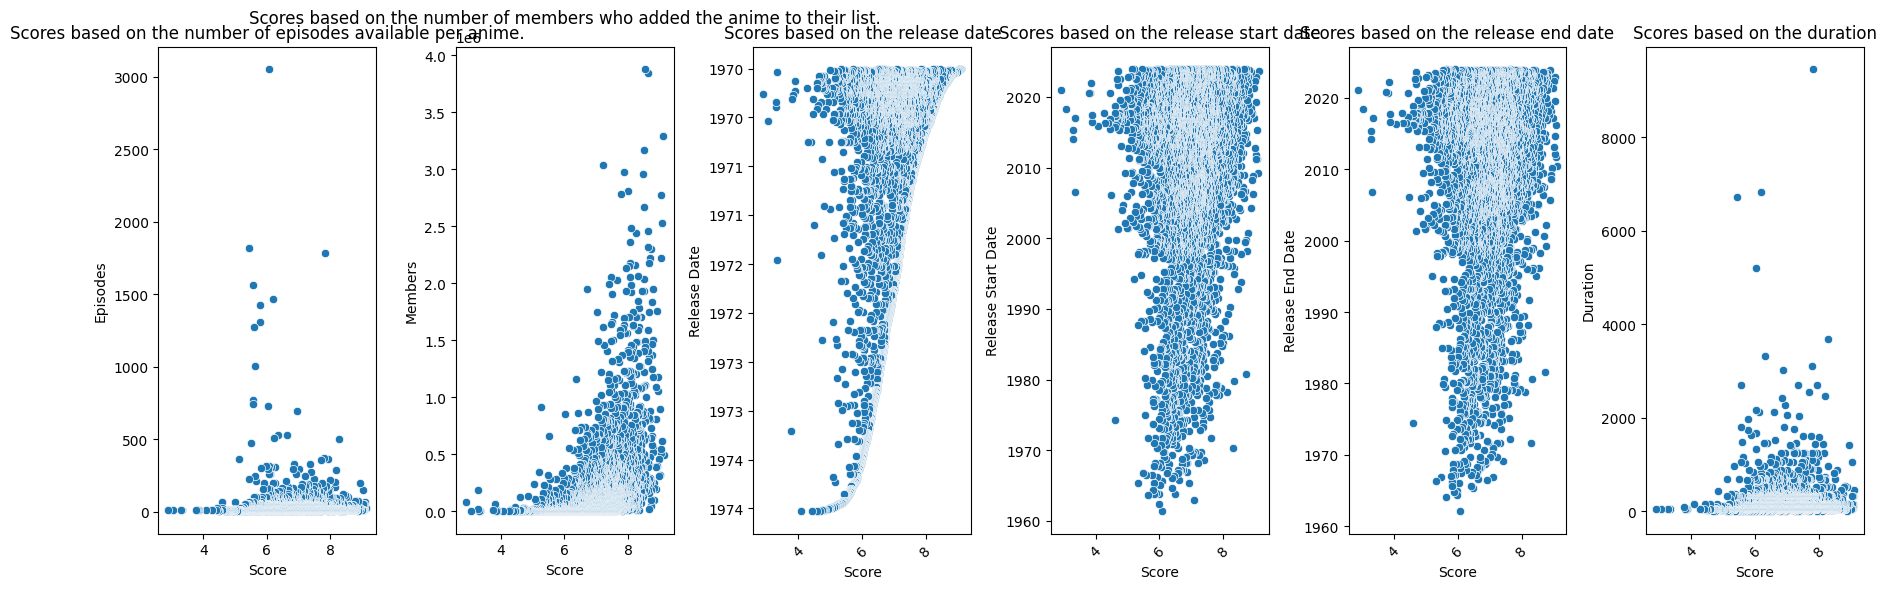

In [51]:
#display fig on same line
fig, axes = plt.subplots(1, 6, figsize=(18, 6))  

# First plot for episodes
sns.scatterplot(x='Score', y='Episodes', data=data_df, ax=axes[0])
axes[0].set_title('Scores based on the number of episodes available per anime.')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Episodes')

# Second plot for members
sns.scatterplot(x='Score', y='Members', data=data_df, ax=axes[1])
axes[1].set_title('Scores based on the number of members who added the anime to their list.')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Members')

sns.scatterplot(x='Score', y='Release', data=data_df, ax=axes[2])
axes[2].set_title('Scores based on the release date')
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Release Date')
axes[2].tick_params(axis='x', rotation=45)

sns.scatterplot(x='Score', y='Release_Start', data=data_df, ax=axes[3])
axes[3].set_title('Scores based on the release start date')
axes[3].set_xlabel('Score')
axes[3].set_ylabel('Release Start Date')
axes[3].tick_params(axis='x', rotation=45)

sns.scatterplot(x='Score', y='Release_End', data=data_df, ax=axes[4])
axes[4].set_title('Scores based on the release end date')
axes[4].set_xlabel('Score')
axes[4].set_ylabel('Release End Date')
axes[4].tick_params(axis='x', rotation=45)

sns.scatterplot(x='Score', y='Duration', data=data_df, ax=axes[5])
axes[5].set_title('Scores based on the duration')
axes[5].set_xlabel('Score')
axes[5].set_ylabel('Duration')
axes[5].tick_params(axis='x', rotation=45)

# Set AutoDateLocator and AutoDateFormatter for x-axis
axes[2].yaxis.set_major_locator(AutoDateLocator())
axes[2].yaxis.set_major_formatter(AutoDateFormatter(AutoDateLocator()))

# Rotate x-axis labels for better readability
axes[2].tick_params(axis='x', rotation=45)

# Set AutoDateLocator and AutoDateFormatter for x-axis
axes[3].yaxis.set_major_locator(AutoDateLocator())
axes[3].yaxis.set_major_formatter(AutoDateFormatter(AutoDateLocator()))

# Rotate x-axis labels for better readability
axes[3].tick_params(axis='x', rotation=45)

# Set AutoDateLocator and AutoDateFormatter for x-axis
axes[4].yaxis.set_major_locator(AutoDateLocator())
axes[4].yaxis.set_major_formatter(AutoDateFormatter(AutoDateLocator()))

# Rotate x-axis labels for better readability
axes[4].tick_params(axis='x', rotation=45)


# Display all plots
plt.tight_layout()
plt.show()

We can see that the more members have added the anime to their lists, the higher its score. On the other hand, the number of episodes seems to explain the score less. As for the release date, we can see that the earlier the release date is, the more score there is. 

### Base model <a class="anchor" id="base_model"></a>

<b>1. problem.py</b><br>

We decide to consider that we have 10 classes to classify the data. We round down the scores to make it easier to classify the anime using their scores. The result is a data set with unbalanced classes (with more observations around 7) as it can be seen on the histogram above.

We only keep numerical data (number of episodes, members in addition to the target) and the release date. There are some missing data in episodes. Those lines are dropped.

In [58]:
#the columns to process
col = ["Members", "Score", "Episodes","Release_Start_Month","Release_Start_Year","Release_End_Month","Release_End_Year","Duration"]
data_sel = train_df[col].copy()

#drop episodes and members with NA
data_sel["Episodes"] = pd.to_numeric(data_sel["Episodes"], errors="coerce")
data_sel = data_sel.dropna(subset=["Episodes"]).copy()
data_sel["Members"] = pd.to_numeric(data_sel["Members"], errors="coerce")
data_sel = data_sel.dropna(subset=["Members"]).copy()
data_sel["Duration"] = pd.to_numeric(data_sel["Duration"], errors="coerce")
data_sel = data_sel.dropna(subset=["Duration"]).copy()
data_sel = data_sel.dropna(subset=["Release_Start_Month"]).copy()
data_sel = data_sel.dropna(subset=["Release_Start_Year"]).copy()
data_sel = data_sel.dropna(subset=["Release_End_Month"]).copy()
data_sel = data_sel.dropna(subset=["Release_End_Year"]).copy()

#target: take the floor of the score to get categories
data_sel["Score"] = pd.to_numeric(data_sel["Score"], errors="coerce").apply(np.floor)
med = data_sel["Score"].median()
data_sel["Score"].fillna(med, inplace=True)

X = data_sel.drop(columns=["Score"]).to_numpy()
y = data_sel["Score"].values

/var/folders/y5/gqrtpjps5wd7__zgkcwxz9zh0000gn/T/ipykernel_1515/3536923631.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_sel["Score"].fillna(med, inplace=True)


In [59]:
X

array([[4.92200e+03, 1.20000e+01, 1.00000e+00, ..., 3.00000e+00,
        2.01400e+03, 5.90000e+01],
       [8.86800e+03, 1.20000e+01, 7.00000e+00, ..., 9.00000e+00,
        2.01700e+03, 6.20000e+01],
       [2.66803e+05, 1.20000e+01, 7.00000e+00, ..., 9.00000e+00,
        2.02200e+03, 6.20000e+01],
       ...,
       [1.63700e+03, 2.30000e+01, 1.00000e+01, ..., 3.00000e+00,
        1.99800e+03, 1.51000e+02],
       [4.71900e+03, 2.60000e+01, 1.10000e+01, ..., 5.00000e+00,
        2.00100e+03, 1.81000e+02],
       [1.13324e+05, 7.80000e+01, 4.00000e+00, ..., 2.00000e+00,
        2.00600e+03, 6.71000e+02]])

In [ ]:
y

array([7., 8., 6., ..., 7., 7., 8.])

<b>2. classifier.py</b><br>

### Submitting on RAMP <a class="anchor" id="submitting"></a>

In [ ]:
!ramp-test --submission starting_kit

Testing Anime TV-Shows classification
Reading train and test files from ./data/ ...
/Users/artsic/Documents/Ressource/Etude/Datacamp/project-datacamp-mangas/problem.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_sel["Score"].fillna(median_score, inplace=True) #remplacer les na par la médiane
/Users/artsic/Documents/Ressource/Etude/Datacamp/project-datacamp-mangas/problem.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavi